In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [2]:


file_path = r"C:\Users\Abdul Jabbar Khan\OneDrive\Desktop\data folder\sms spam\spam.csv"

# Read the CSV file into a Pandas DataFrame with the specified encoding
ds = pd.read_csv(file_path, encoding='latin1')
ds.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
ds=ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [5]:
ds.columns


Index(['v1', 'v2'], dtype='object')

In [6]:
ds

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
ds['v1'] = le.fit_transform(ds['v1'])
ds.v1.value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [9]:
ds.duplicated().sum()

403

In [10]:
ds =ds.drop_duplicates()
ds.v1.value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

In [11]:
ds.duplicated().sum()

0

In [12]:
ds.shape

(5169, 2)

In [13]:
ham=ds[ds['v1']==0].sample(653)
ham

,v1,v2
1343,0,Crazy ar he's married. ÌÏ like gd looking guys...
1277,0,Dont put your phone on silent mode ok
350,0,"Nah can't help you there, I've never had an ip..."
3591,0,I anything lor...
520,0,But that's on ebay it might be less elsewhere.
...,...,...
2211,0,Just gettin a bit arty with my collages at the...
1789,0,Takin a shower now but yeah I'll leave when I'...
3624,0,I want to tel u one thing u should not mistake...
1882,0,"Sorry, I can't help you on this."


In [14]:
spam=ds[ds['v1']==1]
spam

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [15]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 2 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      653 non-null    int32 
 1   v2      653 non-null    object
dtypes: int32(1), object(1)
memory usage: 12.8+ KB


In [16]:
ds2=pd.concat([ham,spam],axis=0)

In [17]:
ds2.head()

,v1,v2
1343,0,Crazy ar he's married. ÌÏ like gd looking guys...
1277,0,Dont put your phone on silent mode ok
350,0,"Nah can't help you there, I've never had an ip..."
3591,0,I anything lor...
520,0,But that's on ebay it might be less elsewhere.


In [18]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 1343 to 5567
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      1306 non-null   int32 
 1   v2      1306 non-null   object
dtypes: int32(1), object(1)
memory usage: 25.5+ KB


In [19]:
ds2.duplicated().sum(), ds2.isnull().sum()

(0,
 v1    0
 v2    0
 dtype: int64)

In [20]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [22]:
hamt = ds2[ds2['v1']==1]
spamt = ds2[ds2['v1']==0]

In [23]:
ham_txt = " ".join(hamt['v2'])
len(ham_txt)

90695

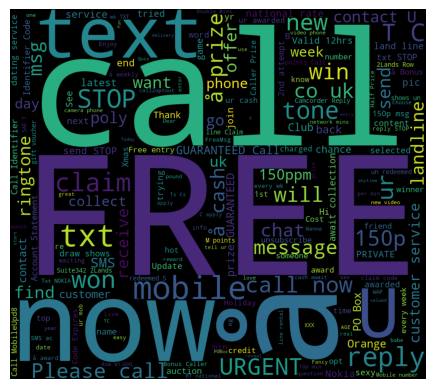

In [24]:
wc=WordCloud(width=900,height=800).generate(ham_txt)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [25]:
spam.head()

,v1,v2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."


In [26]:
spam_txt=" ".join(spamt['v2'])
len(spam_txt)

46944

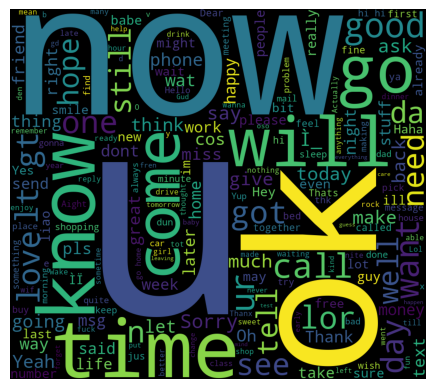

In [27]:
wc1=WordCloud(width=900,height=800).generate(spam_txt)
plt.imshow(wc1)
plt.axis('off')
plt.show()

# MODEL CREATION


In [28]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(ds2['v2'],ds2['v1'],test_size=0.2,random_state=42,stratify=ds2['v1'])

In [29]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((1044,), (1044,), (262,), (262,))

In [30]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [31]:
import spacy

In [32]:
nlp = spacy.load("en_core_web_sm")

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

nlp pipeline

In [36]:
model = Pipeline([
    ('text preprocessing',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in nlp(txt)],
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 500)),
    ('text classifier',RandomForestClassifier())
])

In [38]:
model.fit(xtrain,ytrain)

C:\python310\New folder\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english',
                                 tokenizer=<function <lambda> at 0x000002DB87DD1B40>)),
                ('text classifier', RandomForestClassifier())])

In [39]:
ypred=model.predict(xtest)

In [40]:
ypred[:5]

array([0, 1, 1, 0, 0])

In [43]:
from sklearn.metrics import classification_report as cr
print(cr(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       131
           1       0.99      0.96      0.98       131

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262



# testing

In [44]:
sample_txt = 'hurray !! you won a 25 million dollors'

In [45]:
model = Pipeline([
    ('text preprocessing',TfidfVectorizer(
    tokenizer = lambda txt:[token.lemma_ for token in nlp(sample_txt)],
    stop_words = 'english',
    ngram_range = (1,2),
    max_features = 500)),
    ('text classifier',RandomForestClassifier())
])

In [46]:
model.fit(xtrain,ytrain)

C:\python310\New folder\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\python310\New folder\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['!', '25', 'dollor', 'hurray', 'million', 'win'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('text preprocessing',
                 TfidfVectorizer(max_features=500, ngram_range=(1, 2),
                                 stop_words='english',
                                 tokenizer=<function <lambda> at 0x000002DB8A83A200>)),
                ('text classifier', RandomForestClassifier())])

In [47]:
ypred = model.predict([sample_txt])

In [48]:
print(ypred[0])

1


# As we can see it has correctly classified the sample text as spam i.e. prediction = 1 so the model is working good